In [8]:
import numpy as np


# 오차 제곱합
def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)


t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

sum_squares_error(np.array(y), np.array(t))

np.float64(0.09750000000000003)

In [9]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))


t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

np.float64(0.510825457099338)

In [10]:
# 미니 배치 학습
import numpy as np
import sys, os

sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


# one hot encoding cross entropy error function
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = t.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size


(60000, 784)
(60000, 10)


질문 : 왜 손실 함수를 설정하는가? <br>
대답 : 학습된 모델의 정확도를 파악할 수 있는 지표가 필요한데 그 기준이 되는 매개변수를 찾기 위함이다

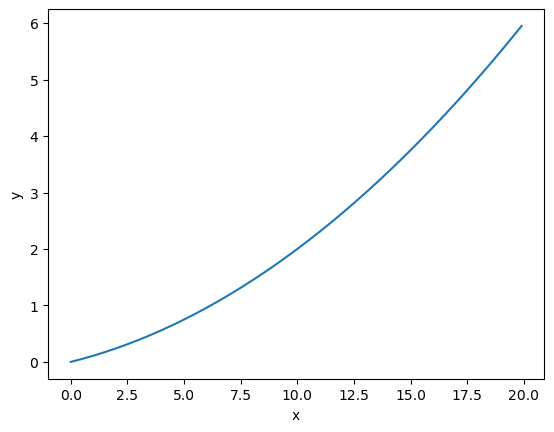

In [13]:
## 미분 함수 구현
import matplotlib.pyplot as plt


def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)


# 특정 함수 f(x) = 0.01*x^2 + 0.1*x
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x


def draw(function, x):
    y = function(x)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x, y)
    plt.show()


x = np.arange(0.0, 20.0, 0.1)

draw(function_1, x)

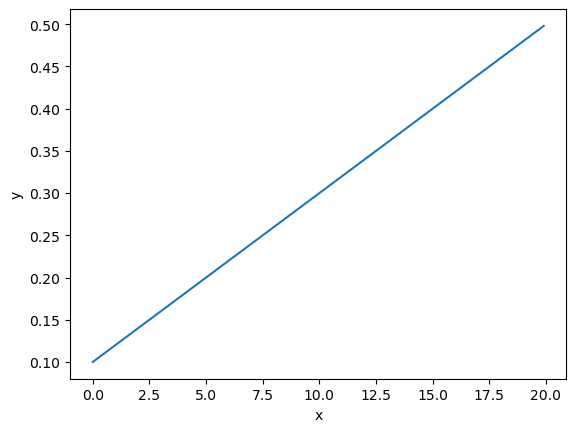

In [14]:
a = numerical_diff(function_1, 5)
b = numerical_diff(function_1, 10)

print(a, b)

In [15]:
from typing import Callable


# 편미분 함수

def function_2(x):
    return x[0] ** 2 + x[1] ** 2


def numerical_gradient(f: Callable[[np.ndarray], np.ndarray], x: np.ndarray):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp = x[idx]

        x[idx] = tmp + h
        fxh1 = f(x)

        x[idx] = tmp - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp  # 값 복원
    return grad


a = numerical_gradient(function_2, np.array([3.0, 4.0]))
b = numerical_gradient(function_2, np.array([0.0, 2.0]))
c = numerical_gradient(function_2, np.array([3.0, 0.0]))

print(a, b, c)

[6. 8.] [0. 4.] [6. 0.]
